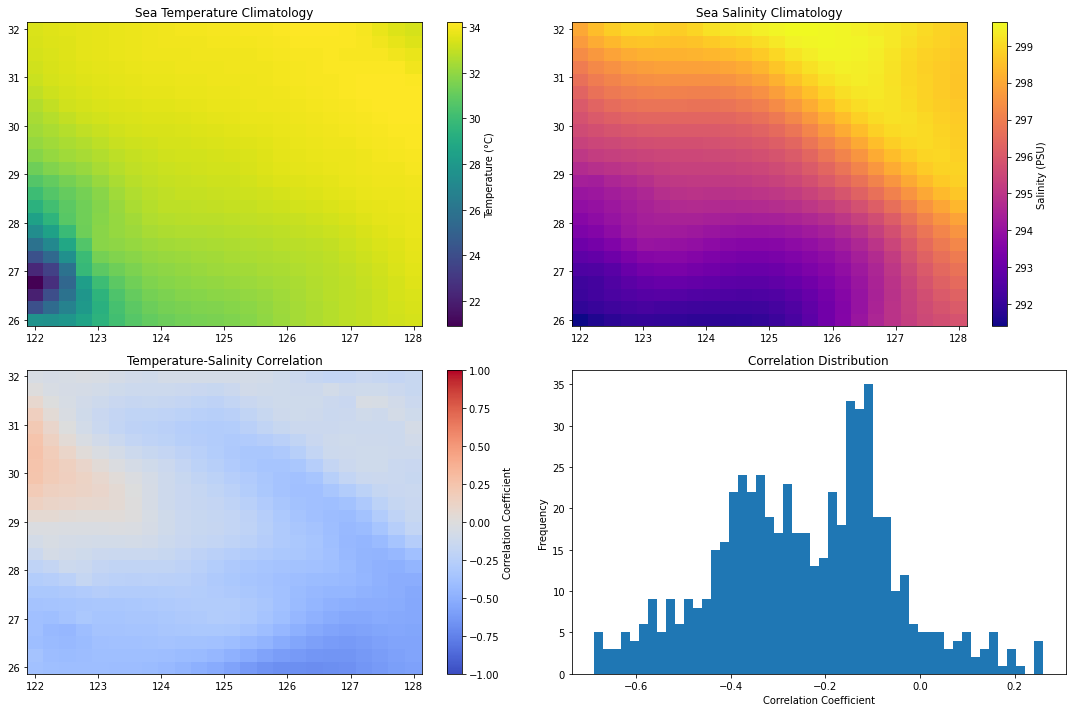

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import netCDF4 as nc

# Load data
ds = nc.Dataset('val_data/eastsea.nc', "r")
data = ds['data'][:]  # Shape: (3600, 576, 2)

# Extract variables
salt = data[..., 0]  # (3600, 576)
temp = data[..., 1]  # (3600, 576)

# Generate 24x24 grid coordinates
lon_stations = np.linspace(122, 128, 24)  # 东经122-128度
lat_stations = np.linspace(26, 32, 24)    # 北纬26-32度
lon_grid, lat_grid = np.meshgrid(lon_stations, lat_stations)

# 计算时空平均
temp_mean = temp.mean(axis=0).reshape(24, 24)
salt_mean = salt.mean(axis=0).reshape(24, 24)

# 重塑数据为三维结构 (time, lat, lon)
temp_3d = temp.reshape(3600, 24, 24)
salt_3d = salt.reshape(3600, 24, 24)

# 计算相关系数矩阵
correlation = np.zeros((24, 24))
for i in range(24):
    for j in range(24):
        correlation[i,j] = np.corrcoef(temp_3d[:,i,j], salt_3d[:,i,j])[0,1]

# 创建绘图
fig, ax = plt.subplots(2, 2, figsize=(15, 10))

# 温度分布
im1 = ax[0,0].pcolormesh(lon_grid, lat_grid, temp_mean, 
                        cmap='viridis', shading='auto')
plt.colorbar(im1, ax=ax[0,0], label='Temperature (°C)')
ax[0,0].set_title('Sea Temperature Climatology')

# 盐度分布
im2 = ax[0,1].pcolormesh(lon_grid, lat_grid, salt_mean,
                        cmap='plasma', shading='auto')
plt.colorbar(im2, ax=ax[0,1], label='Salinity (PSU)')
ax[0,1].set_title('Sea Salinity Climatology')

# 相关性分析
im3 = ax[1,0].pcolormesh(lon_grid, lat_grid, correlation,
                        cmap='coolwarm', vmin=-1, vmax=1, shading='auto')
plt.colorbar(im3, ax=ax[1,0], label='Correlation Coefficient')
ax[1,0].set_title('Temperature-Salinity Correlation')

# 直方图
ax[1,1].hist(correlation.flatten(), bins=50)
ax[1,1].set_xlabel('Correlation Coefficient')
ax[1,1].set_ylabel('Frequency')
ax[1,1].set_title('Correlation Distribution')

plt.tight_layout()
plt.savefig('analysis.png', dpi=300)
plt.show()

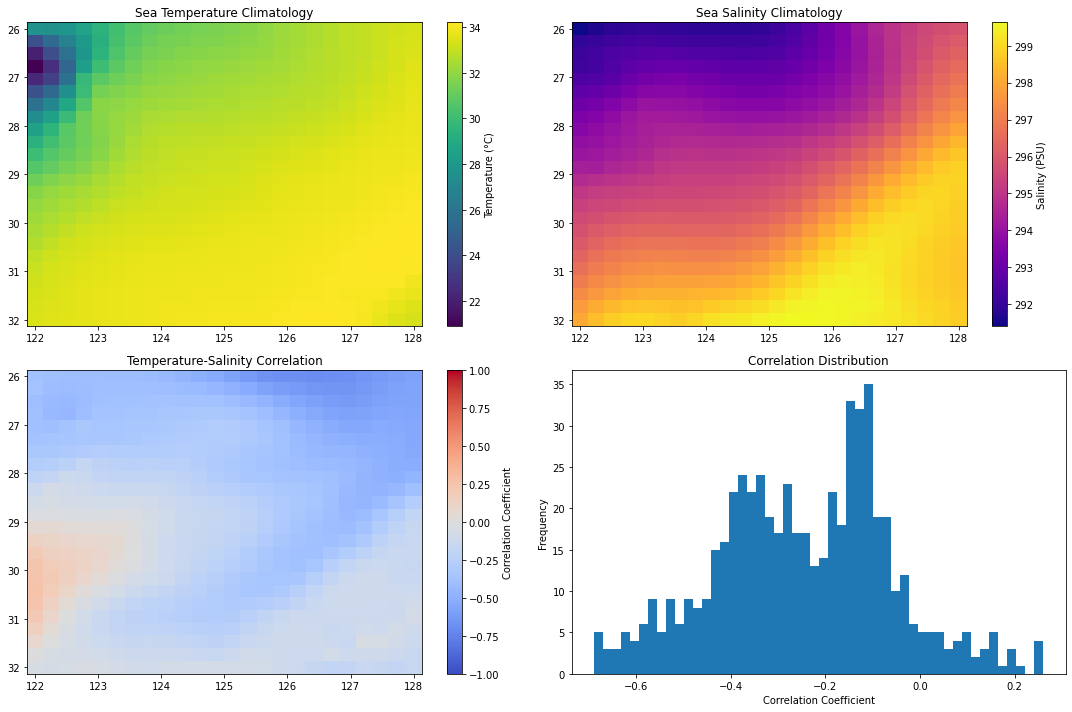

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import netCDF4 as nc

# Load data
ds = nc.Dataset('val_data/eastsea.nc', "r")
data = ds['data'][:]  # Shape: (3600, 576, 2)

# Extract variables
salt = data[..., 0]  # (3600, 576)
temp = data[..., 1]  # (3600, 576)

# Generate 24x24 grid coordinates
lon_stations = np.linspace(122, 128, 24)  # 东经122-128度
lat_stations = np.linspace(26, 32, 24)    # 北纬26-32度
lon_grid, lat_grid = np.meshgrid(lon_stations, lat_stations)

# 计算时空平均
temp_mean = temp.mean(axis=0).reshape(24, 24)
salt_mean = salt.mean(axis=0).reshape(24, 24)

# 重塑数据为三维结构 (time, lat, lon)
temp_3d = temp.reshape(3600, 24, 24)
salt_3d = salt.reshape(3600, 24, 24)

# 计算相关系数矩阵
correlation = np.zeros((24, 24))
for i in range(24):
    for j in range(24):
        correlation[i,j] = np.corrcoef(temp_3d[:,i,j], salt_3d[:,i,j])[0,1]

# 创建绘图
fig, ax = plt.subplots(2, 2, figsize=(15, 10))

# 温度分布
im1 = ax[0,0].pcolormesh(lon_grid, lat_grid, temp_mean, 
                        cmap='viridis', shading='auto')
ax[0,0].invert_yaxis()  # 反转纬度轴
plt.colorbar(im1, ax=ax[0,0], label='Temperature (°C)')
ax[0,0].set_title('Sea Temperature Climatology')

# 盐度分布
im2 = ax[0,1].pcolormesh(lon_grid, lat_grid, salt_mean,
                        cmap='plasma', shading='auto')
ax[0,1].invert_yaxis()  # 反转纬度轴
plt.colorbar(im2, ax=ax[0,1], label='Salinity (PSU)')
ax[0,1].set_title('Sea Salinity Climatology')

# 相关性分析
im3 = ax[1,0].pcolormesh(lon_grid, lat_grid, correlation,
                        cmap='coolwarm', vmin=-1, vmax=1, shading='auto')
ax[1,0].invert_yaxis()  # 反转纬度轴
plt.colorbar(im3, ax=ax[1,0], label='Correlation Coefficient')
ax[1,0].set_title('Temperature-Salinity Correlation')

# 直方图
ax[1,1].hist(correlation.flatten(), bins=50)
ax[1,1].set_xlabel('Correlation Coefficient')
ax[1,1].set_ylabel('Frequency')
ax[1,1].set_title('Correlation Distribution')

plt.tight_layout()
plt.savefig('analysis.png', dpi=300)
plt.show()